<a href="https://colab.research.google.com/github/K2FA/PCVK_Genap_2023/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Importing Library
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# 2

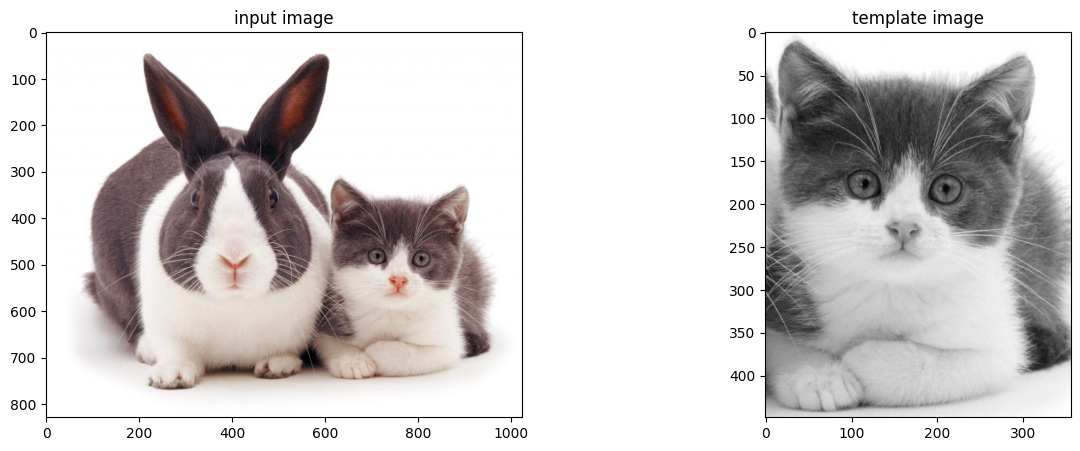

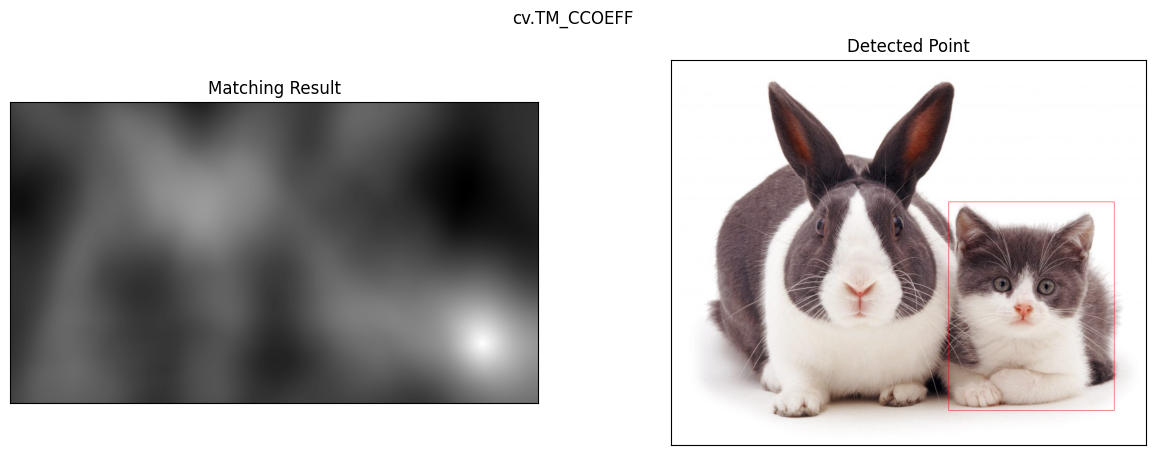

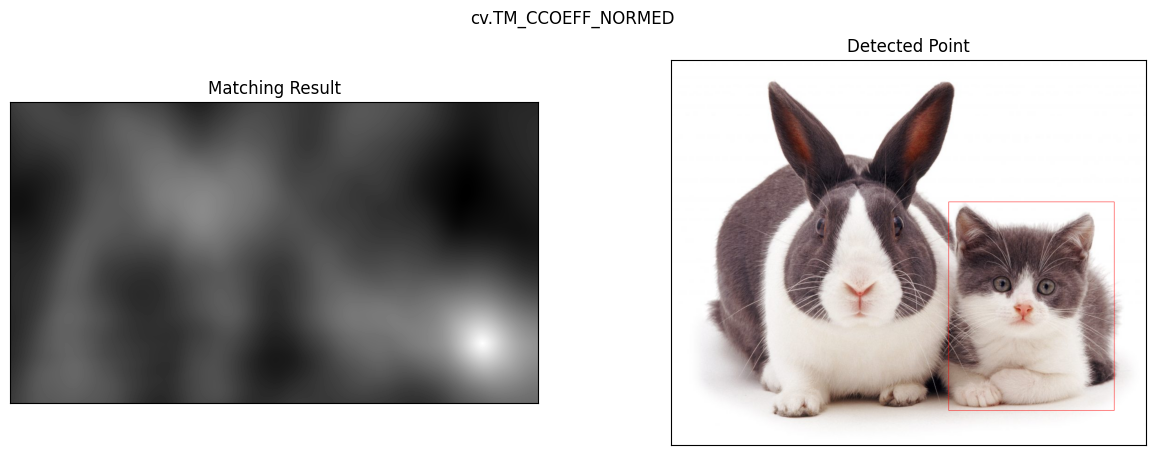

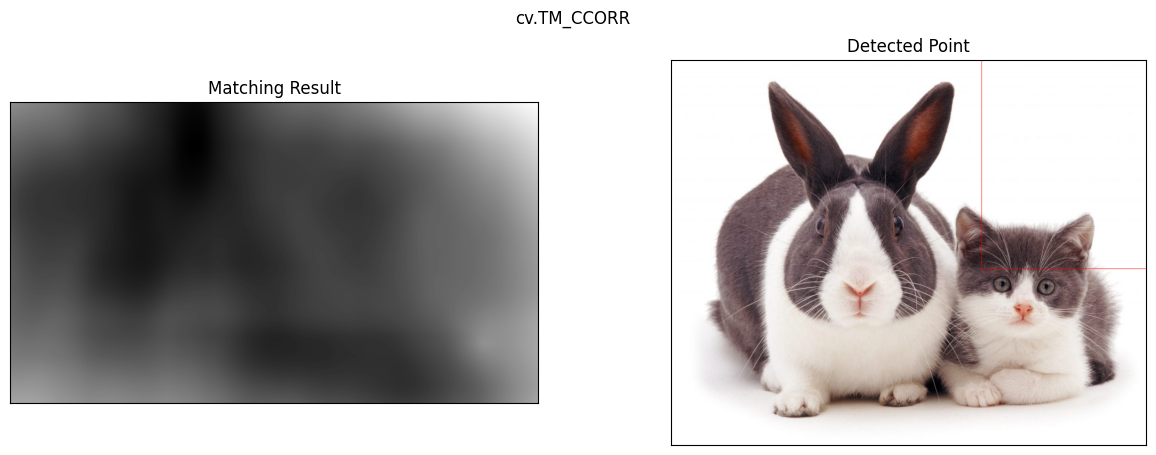

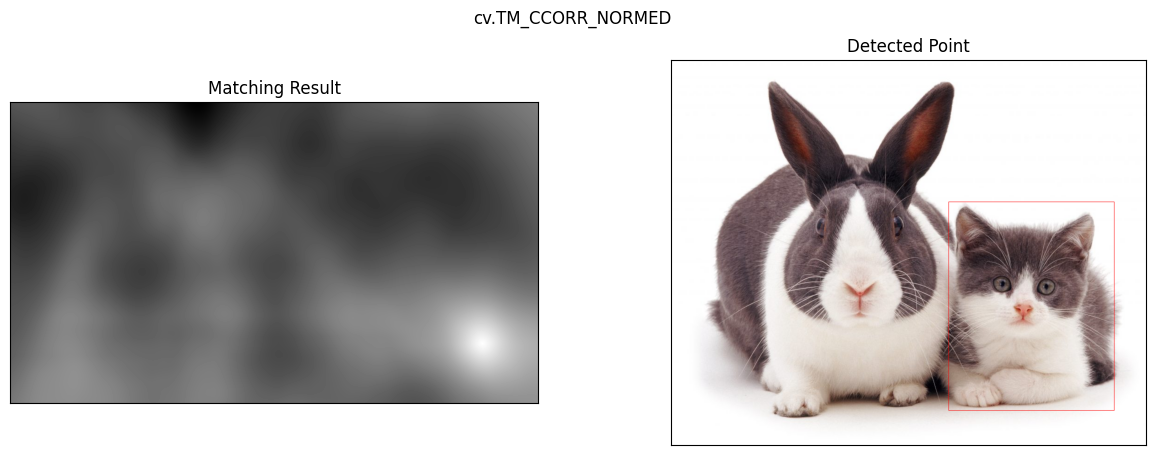

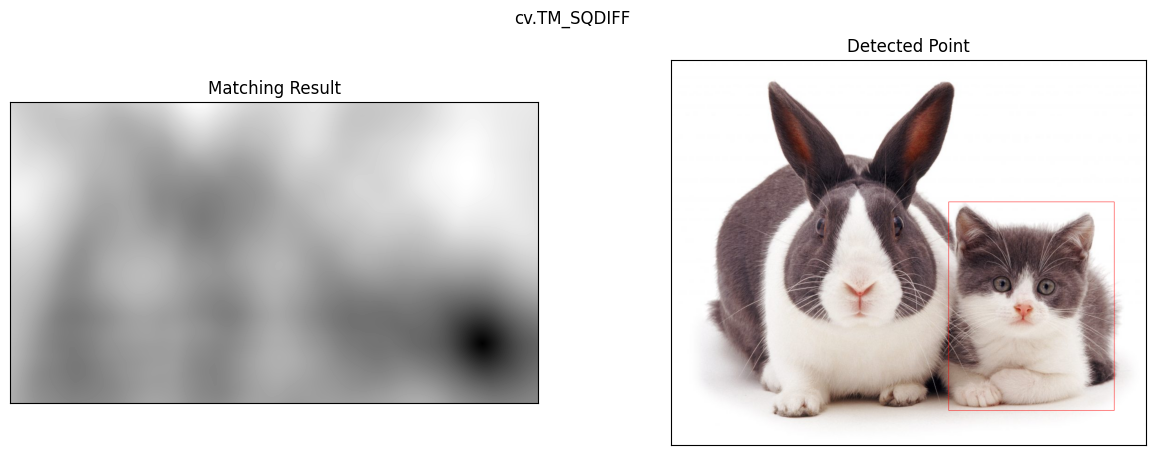

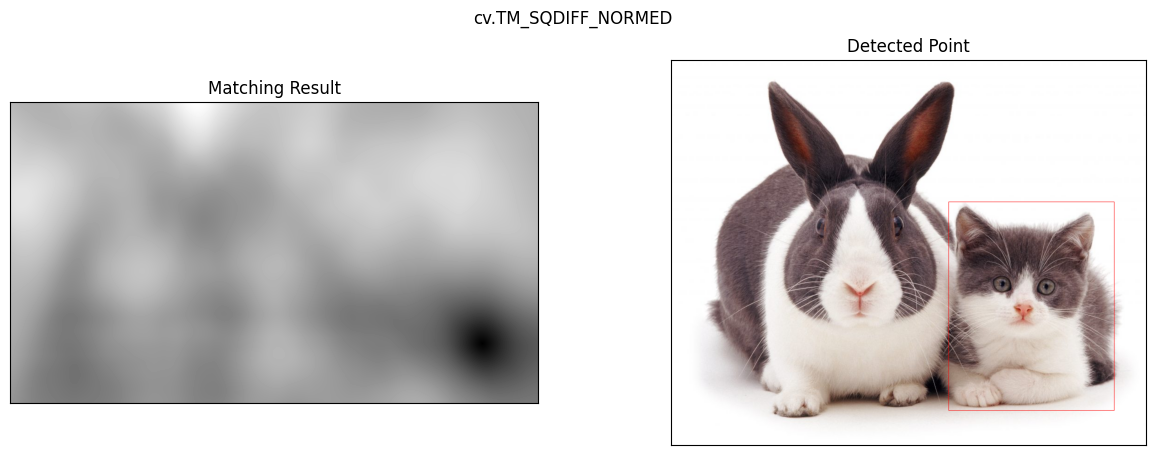

In [12]:
img_cat_bunnies = cv.imread('/content/drive/MyDrive/PCVK/11/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img_cat_bunnies,cv.COLOR_BGR2GRAY)
img_cat_bunnies2 = img_cat_bunnies.copy()

template = cv.imread('/content/drive/MyDrive/PCVK/11/cat2_templatejpg.jpg', 0)

w, h = template.shape[:: -1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template 
axarr[0].imshow(cv.cvtColor(img_cat_bunnies2, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All Method
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
  img = img_cat_bunnies2.copy()
  method = eval(meth)

  # Apply template Matching
  res = cv.matchTemplate(img_gray,template,method)
  min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

  # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
  if(method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]):
    top_left = min_loc
  else :
    top_left = max_loc
  bottom_right = (top_left[0] + w, top_left[1] + h)

  cv.rectangle(img,top_left,bottom_right, (0,0,255))

  plt.figure(figsize= (15,5))
  plt.subplot(121),plt.imshow(res, cmap = 'gray')
  plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
  plt.suptitle(meth)
  plt.show()

# 3

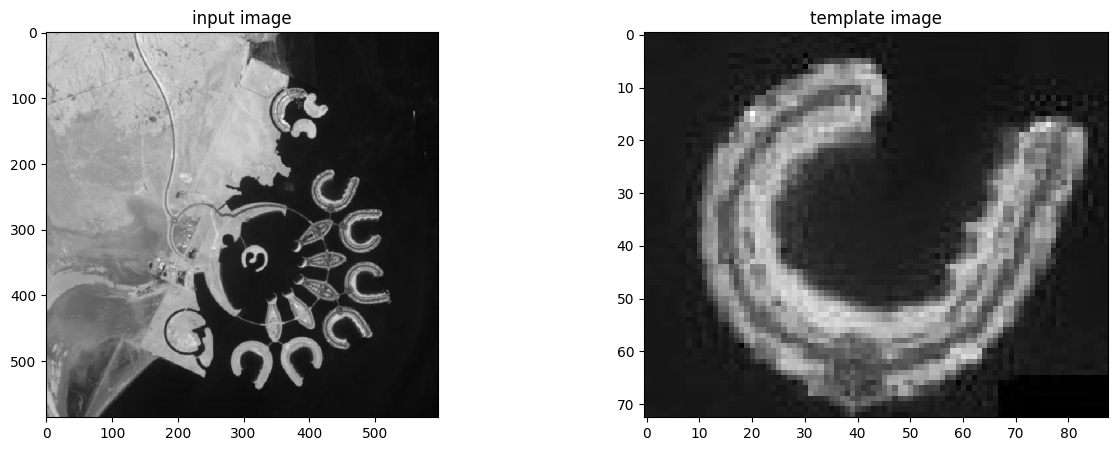

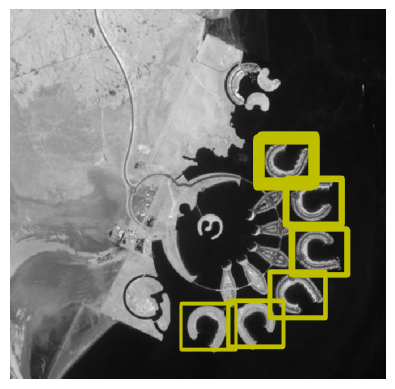

In [13]:
from skimage.io import imread
from skimage.feature import match_template
from skimage.color import rgb2gray

# Load the input image and template
image = rgb2gray(imread('/content/drive/MyDrive/PCVK/11/bahrain.jpg'))
template = rgb2gray(imread('/content/drive/MyDrive/PCVK/11/bahrain-template.jpg'))

# mencari kemiripan antara gambar input dengan gambar template menggunakan fungsi match_template()
result = match_template(image, template)

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) 
axarr[0].imshow(image,cmap=plt.cm.gray), axarr[0].set_title("input image") 
axarr[1].imshow(template,cmap=plt.cm.gray), axarr[1].set_title("template image")

threshold = 0.45
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='y', facecolor='none')
    ax.add_patch(rect)
plt.show()

# 4

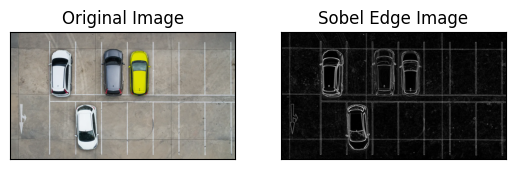

In [14]:
img_car = cv.imread('/content/drive/MyDrive/PCVK/11/car-park.jpg')
img_gray = cv.cvtColor(img_car,cv.COLOR_BGR2GRAY)
img_blur = cv.GaussianBlur(img_gray,(3,3),0)

# Sobel Edge Detection
sobelx = cv.Sobel(img_blur, cv.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis
sobely = cv.Sobel(img_blur, cv.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
sobelxy = cv.addWeighted(cv.convertScaleAbs(sobelx), 0.5, cv.convertScaleAbs(sobely), 0.5, 0)

plt.subplot(121),plt.imshow(cv.cvtColor(img_car,cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sobelxy, cmap = 'gray')
plt.title('Sobel Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

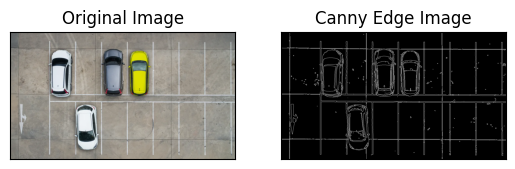

In [15]:
edges = cv.Canny(img_car,100,200)

plt.subplot(121),plt.imshow(cv.cvtColor(img_car,cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Canny Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

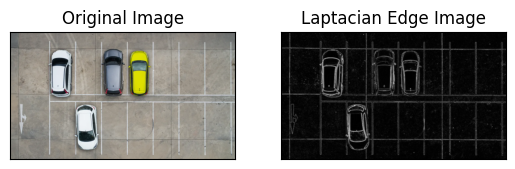

In [16]:
laplacian = cv.Laplacian(img_blur,cv.CV_64F,ksize = 3)

# converting back to uint8
abs_dst = cv.convertScaleAbs(laplacian)

plt.subplot(121),plt.imshow(cv.cvtColor(img_car,cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(abs_dst,cmap = 'gray')
plt.title('Laptacian Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# 5

**Harris Corner Detection**

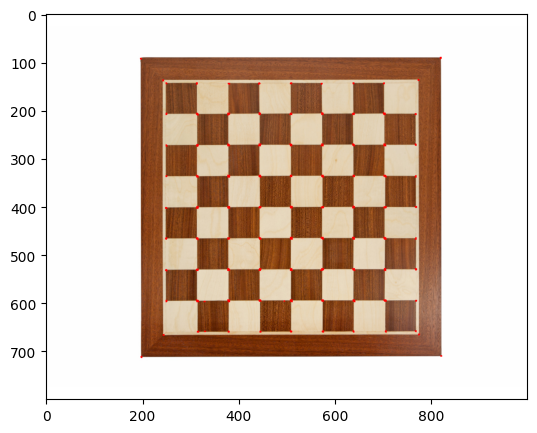

In [39]:
chess = cv.imread('/content/drive/MyDrive/PCVK/11/chess-board.jpg')
chess_gray = cv.cvtColor(chess, cv.COLOR_BGR2GRAY)

gray = np.float32(chess_gray)
harris = cv.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
harris= cv.dilate(harris,None)

# Threshold for an optimal value, it may vary depending on the image.
chess[harris>0.01*harris.max()]=[0,0,255]

plt.figure(figsize=(15,5))
plt.imshow(cv.cvtColor(chess, cv.COLOR_BGR2RGB))
plt.show()

**Shi-Tomasi Corner Detection**

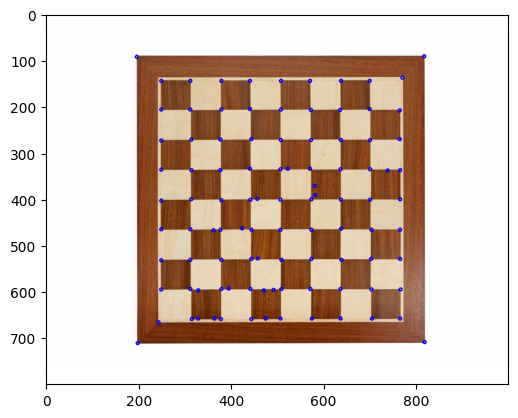

In [40]:
img_chess = cv.imread('/content/drive/MyDrive/PCVK/11/chess-board.jpg')
gray = cv.cvtColor(img_chess, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray,100,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv.circle(img_chess,(x,y),3,255,2)

# plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img_chess, cv.COLOR_BGR2RGB))
plt.show()

# 6

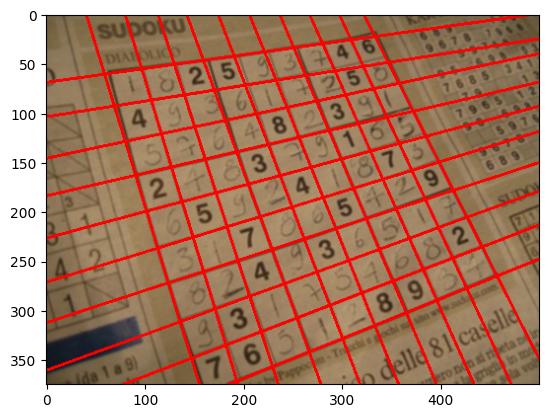

In [35]:
sudoku = cv.imread('/content/drive/MyDrive/PCVK/11/sudoku.jpg')
sudoku_gray = cv.cvtColor(sudoku, cv.COLOR_BGR2GRAY)

edges = cv.Canny (sudoku_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8) 
edges = cv.dilate(edges, kernel, iterations = 1)

kernel = np.ones((5,5), np.uint8) 
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges, 1, np.pi / 180, 150)


if not lines.any():
    print('No lines were found') 
    exit()

if filter:
    rho_threshold = 15 
    theta_threshold = 0.1

 
    similar_lines = {i : [] for i in range(len(lines))} 
    for i in range(len(lines)): 
      for j in range (len (lines)): 
        if i == j: 
            continue

        rho_i, theta_i = lines[i][0] 
        rho_j, theta_j = lines[j][0] 
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)


    indices = [i for i in range(len(lines))] 
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True] 
    for i in range(len(lines) - 1): 
        if not line_flags [indices[i]]: 
            continue

        for j in range(i + 1, len(lines)): 
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0] 
            rho_j, theta_j = lines[indices[j]][0] 
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    # print('number of Hough lines:', len(lines))
    
    filtered_lines = []

    if filter:
        for i in range(len(lines)): 
            if line_flags[i]:
                filtered_lines.append(lines[i])

            # print('Number of filtered lines:', len(filtered_lines )) 
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0] 
        a = np.cos(theta) 
        b = np.sin(theta) 
        x0 = a*rho 
        y0 = b*rho 
        x1 = int(x0 + 1000*(-b)) 
        y1 = int(y0 + 1000*(a)) 
        x2 = int(x0 - 1000*(-b)) 
        y2 = int(y0 - 1000*(a))

        cv.line(sudoku, (x1, y1), (x2,y2),(0,0,255),2)

    # plt.figure(figsize=(20,10)) 
    plt.imshow(cv.cvtColor(sudoku, cv.COLOR_BGR2RGB))
    plt.show()

# 7

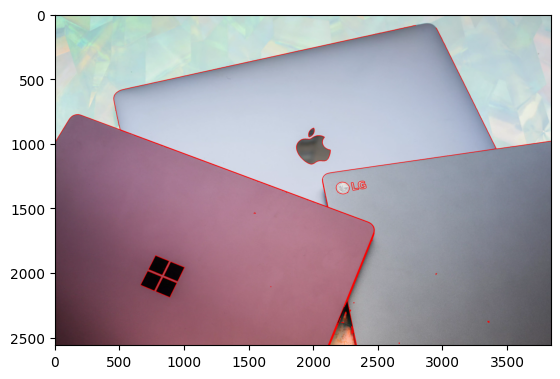

In [34]:
laptop = cv.imread('/content/drive/MyDrive/PCVK/11/laptop.jpg')
laptop_gray = cv.cvtColor(laptop, cv.COLOR_BGR2GRAY)

edged = cv.Canny(laptop_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(laptop, contours, -1, (0,0,255), 3)

plt.imshow(cv.cvtColor(laptop, cv.COLOR_BGR2RGB))
plt.show()